# E-Commerce Sample Dataset Analysis

### The dataset is provided in my [GitHub Repository](https://github.com/CountingCrows/E-Commerce_Sales_Analysis_Project/tree/main)
#### Tasks
- Average Transaction Per User Value
- Median Transaction Per User Value
- Create visualization from the raw data that gives management some meaningful insight for the business.
- What should the management do to increase the transaction?

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_excel('commerce sample dataset.xlsx')
df.head()

,id,timestamp purchase,user_id,SKU,kategori,jumlah,harga,total harga
0,479hf,2023-05-14 19:01:59,83683,lilin,aksesoris rumah,1,4000.0,4000
1,389w,2023-01-28 09:54:35,12622,pisau,alat dapur,1,432000.0,432000
2,633bq,2023-02-07 01:44:32,12622,raket tenis,olahraga,1,4000000.0,4000000
3,134g,2023-01-26 06:21:45,16054,wajan anti lengket,alat dapur,1,500000.0,500000
4,122j,2023-01-27 00:20:22,17762,pisau,alat dapur,1,432000.0,432000


In [3]:
df.shape

(477, 8)

In [4]:
df.sum().isnull()

id                    False
timestamp purchase    False
user_id               False
SKU                   False
kategori              False
jumlah                False
harga                 False
total harga           False
dtype: bool

In [5]:
df.dtypes

id                     object
timestamp purchase     object
user_id                 int64
SKU                    object
kategori               object
jumlah                  int64
harga                 float64
total harga             int64
dtype: object

In [6]:
df.info

<bound method DataFrame.info of         id   timestamp purchase  user_id                 SKU         kategori  \
0    479hf  2023-05-14 19:01:59    83683               lilin  aksesoris rumah   
1     389w  2023-01-28 09:54:35    12622               pisau       alat dapur   
2    633bq  2023-02-07 01:44:32    12622         raket tenis         olahraga   
3     134g  2023-01-26 06:21:45    16054  wajan anti lengket       alat dapur   
4     122j  2023-01-27 00:20:22    17762               pisau       alat dapur   
..     ...                  ...      ...                 ...              ...   
472   455y  2023-03-15 03:32:00    52594      tanaman rambat     tanaman hias   
473   351k  2023-03-09 06:13:23    55002              rumput     tanaman hias   
474  316tr  2023-04-29 01:18:27    65509      tanaman rambat     tanaman hias   
475  217nl  2023-04-12 18:39:21    70341      tanaman rambat     tanaman hias   
476  207e3  2023-05-22 19:43:37    86185              rumput     tanaman hias

In [7]:
df.describe()

,user_id,jumlah,harga,total harga
count,477.000000,477.000000,4.740000e+02,4.770000e+02
mean,43429.832285,1.438155,3.182447e+06,4.520901e+06
std,25458.507272,2.466339,7.539708e+06,1.114246e+07
min,1388.000000,1.000000,0.000000e+00,0.000000e+00
25%,19236.000000,1.000000,8.000000e+04,8.000000e+04
50%,41497.000000,1.000000,3.000000e+05,3.000000e+05
75%,66848.000000,1.000000,2.500000e+06,2.500000e+06
max,89996.000000,40.000000,9.700000e+07,1.000000e+08


### Find the Average Transaction Per User Value and Median Transaction Per User Value

In [8]:
# Compute the average transaction per user value
avg_transaction_per_user = df.groupby('user_id')['total harga'].mean().mean()

# Compute the median transaction per user value
median_transaction_per_user = df.groupby('user_id')['total harga'].median().median()

print(f"Average Transaction Per User Value: {avg_transaction_per_user}")
print(f"Median Transaction Per User Value: {median_transaction_per_user}")

Average Transaction Per User Value: 4935584.184587813
Median Transaction Per User Value: 500000.0


### Analyzing Peak Shopping Hours
- We need to make a new 'date' and 'time' column
- Making a Transactions by Hour plot
- Making a Sales by Hour plot

In [9]:
df.head()

,id,timestamp purchase,user_id,SKU,kategori,jumlah,harga,total harga
0,479hf,2023-05-14 19:01:59,83683,lilin,aksesoris rumah,1,4000.0,4000
1,389w,2023-01-28 09:54:35,12622,pisau,alat dapur,1,432000.0,432000
2,633bq,2023-02-07 01:44:32,12622,raket tenis,olahraga,1,4000000.0,4000000
3,134g,2023-01-26 06:21:45,16054,wajan anti lengket,alat dapur,1,500000.0,500000
4,122j,2023-01-27 00:20:22,17762,pisau,alat dapur,1,432000.0,432000


In [10]:
### We found an invalid date: 2023-02-29
def convert_to_datetime(s):
    try:
        return pd.to_datetime(s)
    except:
        return pd.NaT  # return a "Not a Timestamp" for invalid dates
# Convert using the error-handling function
df['timestamp purchase'] = df['timestamp purchase'].apply(convert_to_datetime)

# Remove rows with NaT values or replace them
df = df.dropna(subset=['timestamp purchase'])  # this will drop rows with NaT
# Alternatively, you can replace NaT with another valid timestamp or fill method.

# Now, split the timestamp purchase into date and time
df['date'] = df['timestamp purchase'].dt.date
df['time'] = df['timestamp purchase'].dt.time

print(df.head())

      id  timestamp purchase  user_id                 SKU         kategori  \
0  479hf 2023-05-14 19:01:59    83683               lilin  aksesoris rumah   
1   389w 2023-01-28 09:54:35    12622               pisau       alat dapur   
2  633bq 2023-02-07 01:44:32    12622         raket tenis         olahraga   
3   134g 2023-01-26 06:21:45    16054  wajan anti lengket       alat dapur   
4   122j 2023-01-27 00:20:22    17762               pisau       alat dapur   

   jumlah      harga  total harga        date      time  
0       1     4000.0         4000  2023-05-14  19:01:59  
1       1   432000.0       432000  2023-01-28  09:54:35  
2       1  4000000.0      4000000  2023-02-07  01:44:32  
3       1   500000.0       500000  2023-01-26  06:21:45  
4       1   432000.0       432000  2023-01-27  00:20:22  


In [11]:
df['timestamp purchase'] = pd.to_datetime(df['timestamp purchase'])
df.head()

,id,timestamp purchase,user_id,SKU,kategori,jumlah,harga,total harga,date,time
0,479hf,2023-05-14 19:01:59,83683,lilin,aksesoris rumah,1,4000.0,4000,2023-05-14,19:01:59
1,389w,2023-01-28 09:54:35,12622,pisau,alat dapur,1,432000.0,432000,2023-01-28,09:54:35
2,633bq,2023-02-07 01:44:32,12622,raket tenis,olahraga,1,4000000.0,4000000,2023-02-07,01:44:32
3,134g,2023-01-26 06:21:45,16054,wajan anti lengket,alat dapur,1,500000.0,500000,2023-01-26,06:21:45
4,122j,2023-01-27 00:20:22,17762,pisau,alat dapur,1,432000.0,432000,2023-01-27,00:20:22


In [12]:
df['hour'] = df['timestamp purchase'].dt.hour
df['minute'] = df['timestamp purchase'].dt.minute
df.head()

,id,timestamp purchase,user_id,SKU,kategori,jumlah,harga,total harga,date,time,hour,minute
0,479hf,2023-05-14 19:01:59,83683,lilin,aksesoris rumah,1,4000.0,4000,2023-05-14,19:01:59,19,1
1,389w,2023-01-28 09:54:35,12622,pisau,alat dapur,1,432000.0,432000,2023-01-28,09:54:35,9,54
2,633bq,2023-02-07 01:44:32,12622,raket tenis,olahraga,1,4000000.0,4000000,2023-02-07,01:44:32,1,44
3,134g,2023-01-26 06:21:45,16054,wajan anti lengket,alat dapur,1,500000.0,500000,2023-01-26,06:21:45,6,21
4,122j,2023-01-27 00:20:22,17762,pisau,alat dapur,1,432000.0,432000,2023-01-27,00:20:22,0,20


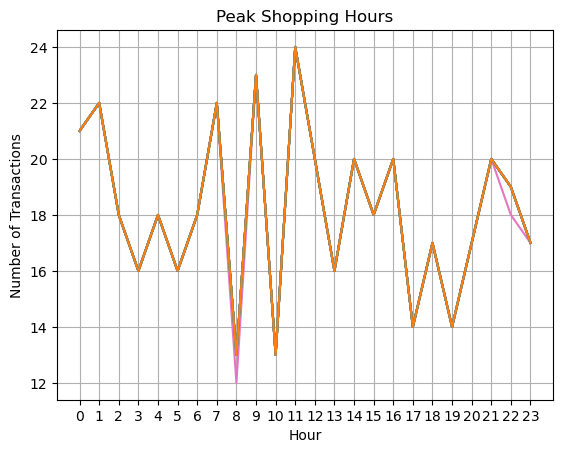

In [33]:
hours = [hour for hour, df in df.groupby('hour')]

plt.plot(hours, df.groupby(['hour']).count())
plt.xticks(hours)
plt.title('Peak Shopping Hours')
plt.xlabel('Hour')
plt.ylabel('Number of Transactions')
plt.grid()
plt.show()

#### From the Peak Hour Analysis, we found that there were 4 peak hours of number of transactions over 20, and 4 times were number of transactions were under 16 transactions. We can suggest to the management to find why number of transactions around 06.00 to 12.00 are very fluctuative and why number of transactions from 13.00 to midnight are decreasing.

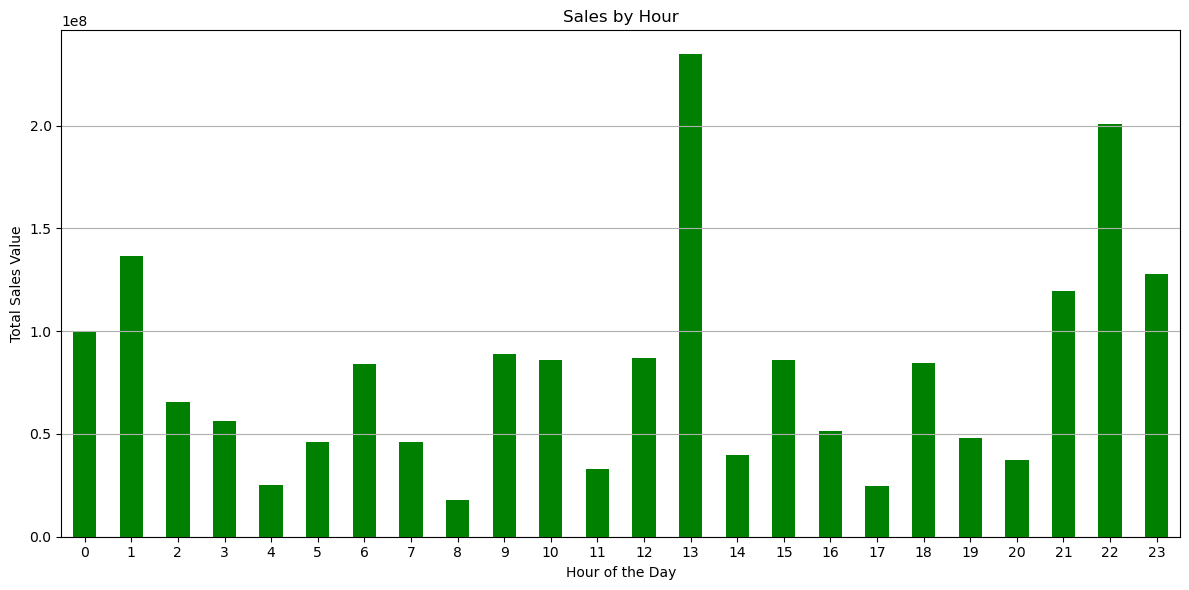

In [14]:
sales_by_hour = df.groupby('hour')['total harga'].sum()

# Plot
sales_by_hour.plot(kind='bar', figsize=(12, 6), color='green')
plt.title('Sales by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#### From the Sales by Hour bar chart, we can find the peak hours that generated the most profit is at 13.00 and from 21.00 to 23.00 combined. We can suggest to run ads from 11.00 and above 18.00.

### Product Performance Analysis. 
- based on the name of the product from column 'SKU' and its total price from 'total harga'

In [15]:
sales_by_product = df.groupby('SKU')['total harga'].sum()
sorted_sales_by_product = sales_by_product.sort_values(ascending=False)
print(sorted_sales_by_product)

SKU
iphone               525000000
raket tenis          248000000
karpet turki         240000000
stick golf           115000000
huawei smartphone    106400000
                       ...    
bumbu pecel               6000
sprite                    5000
coca-cola                 5000
batu akik                 5000
lilin                     4000
Name: total harga, Length: 103, dtype: int64


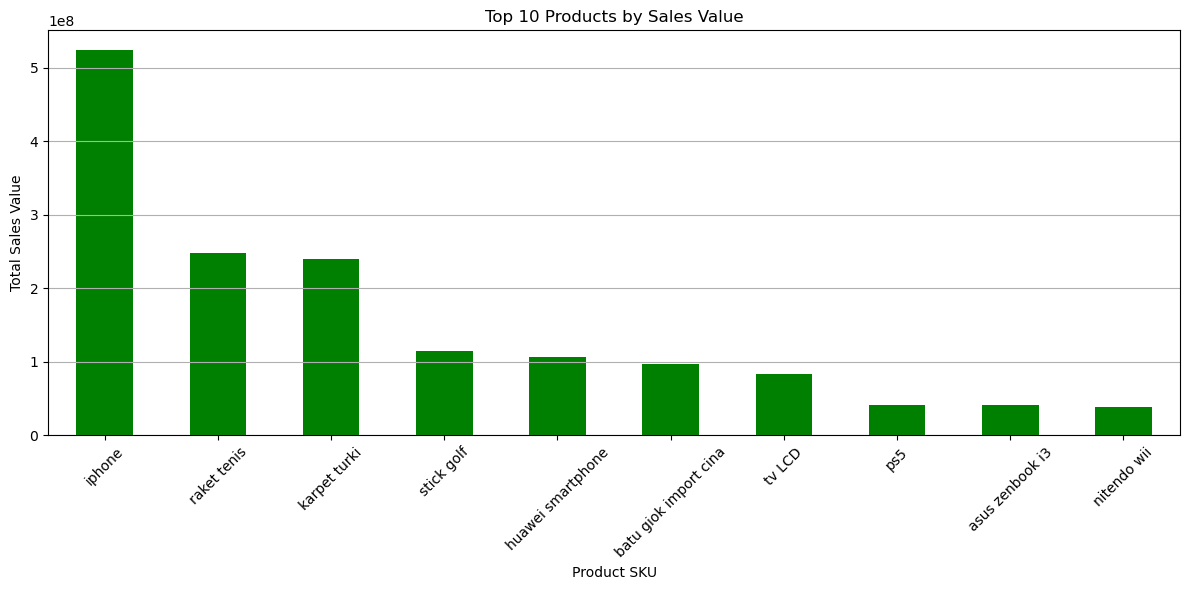

In [16]:
# Considering there might be many SKUs, it might be more informative to show top N products.
top_n = 10
top_products = sales_by_product.nlargest(top_n)

top_products.plot(kind='bar', figsize=(12, 6), color='green')
plt.title('Top 10 Products by Sales Value')
plt.xlabel('Product SKU')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#### From the top 5 products by total sales value, we can suggest to the management to push ads for those products, and make sure that the stores inventory is always stocked for these products.

### User Behavior Analysis
1. Active Users by Hour
2. New vs Repeat Customers by Hour

In [34]:
active_users_by_hour = df.groupby('hour')['user_id'].nunique()
active_users_by_hour

hour
0     21
1     22
2     18
3     16
4     18
5     16
6     18
7     22
8     13
9     22
10    13
11    23
12    19
13    15
14    20
15    18
16    20
17    14
18    17
19    14
20    17
21    20
22    18
23    17
Name: user_id, dtype: int64

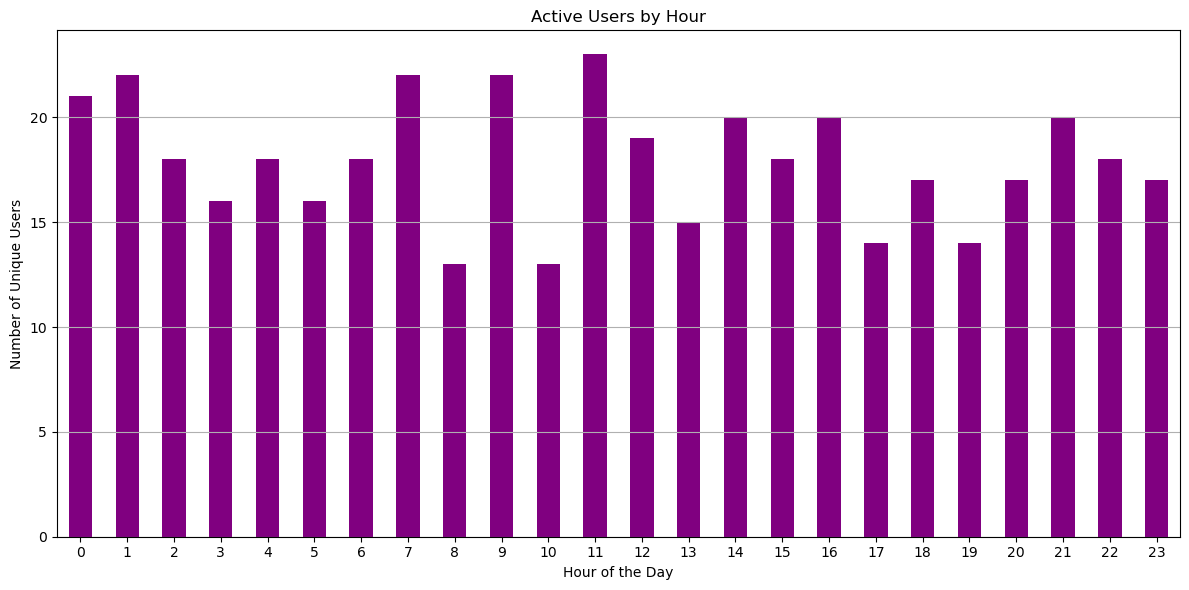

In [25]:
active_users_by_hour.plot(kind='bar', figsize=(12, 6), color='purple')
plt.title('Active Users by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### We can say that with the most Active Users by Hour at 00.00 to 01.00, and at certain hours such as 07.00, 09.00 and 11.00, we can suggest the management to make marketing ads for active users during the time.

In [18]:
repeat_users = df['user_id'].value_counts()[df['user_id'].value_counts() > 1].index.tolist()
df['customer_type'] = df['user_id'].apply(lambda x: 'Repeat' if x in repeat_users else 'New')

In [19]:
customers_by_hour = df.groupby(['hour', 'customer_type']).size().unstack().fillna(0)

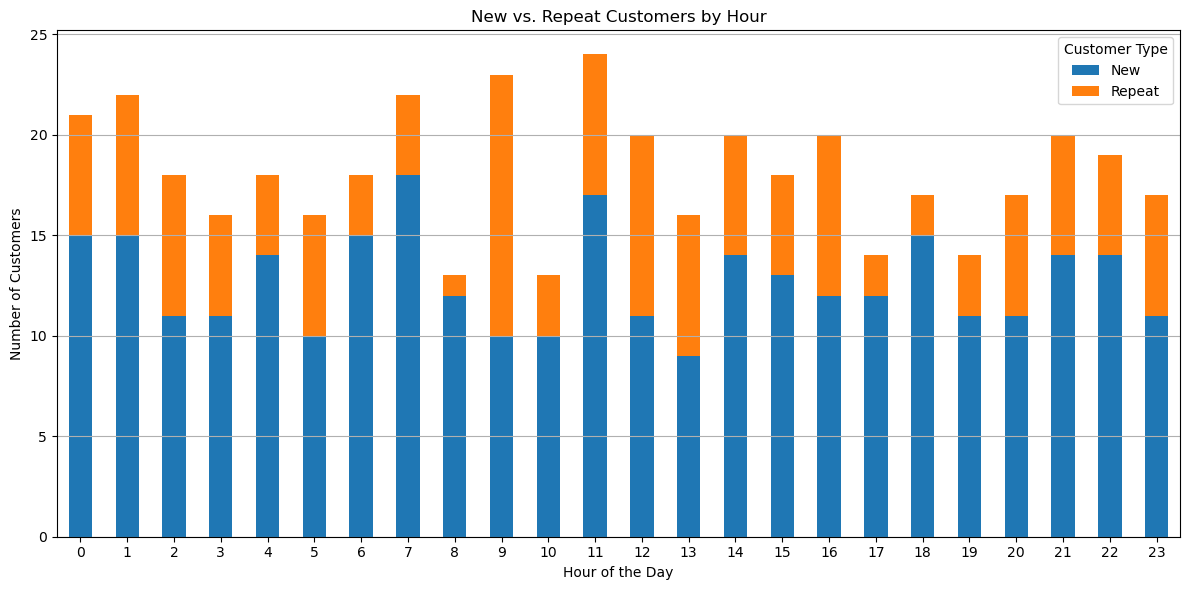

In [20]:
customers_by_hour.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('New vs. Repeat Customers by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title='Customer Type')
plt.show()

#### From this plot, we can conclude that more than 15 new customers are coming from 07.00 and 11.00 and there's a good pattern of repeating customers from 00.00 to 06.00, 11.00 to 17.00 and 21.00 to 23.00. We suggest the management to continue obtaining new customers by giving them marketing ads and maybe also CRM.

### Sales Analysis
#### Tasks
- Sales Distribution
- Sales by Category
- Total Sales Over Time

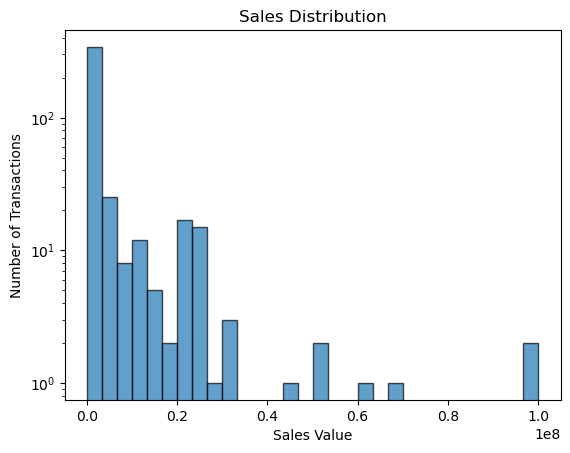

In [22]:
plt.hist(df['total harga'], bins=30, edgecolor='black', alpha=0.7, log=True)
plt.title('Sales Distribution')
plt.xlabel('Sales Value')
plt.ylabel('Number of Transactions')
plt.show()

#### From the sales distribution plot, we can see that around 100 transactions generated sales to around 20 million. Where under 5 number of transactions generated sales around 100 million. 


In [24]:
sales_by_category = df.groupby('kategori')['total harga'].sum()
top_10_categories = sales_by_category.sort_values(ascending=False).head(10)
print(top_10_categories)

kategori
gadget & aksesoris    948060000
olahraga              367700000
dekorasi rumah        278485000
elektronik            114700000
hiasan rumah           97000000
otomotif               25800000
perkakas               20000000
furniture              18750000
alat dapur             16577000
home appliances        10000000
Name: total harga, dtype: int64


In [25]:
bottom_10_categories = sales_by_category.sort_values(ascending=False).tail(10)
print(bottom_10_categories)

kategori
sembako                560000
dapur                  492000
binatang peliharaan    383000
kebutuhan anak         267000
bumbu dapur            225000
personal care           80000
minuman                 77000
bahan makanan           60000
kesehatan               30000
aksesoris rumah          4000
Name: total harga, dtype: int64


In [33]:
sorted_sales_by_category = sales_by_category.sort_values(ascending=False)
print(sorted_sales_by_category)

kategori
gadget & aksesoris        948060000
olahraga                  367700000
dekorasi rumah            278485000
elektronik                114700000
hiasan rumah               97000000
otomotif                   25800000
perkakas                   20000000
furniture                  18750000
alat dapur                 16577000
home appliances            10000000
peternakan & perikanan      6495000
makanan                     6106000
bahan bangunan              6080000
kecantikan                  3289000
mainan anak                 2631000
tanaman hias                1202000
hobi                        1000000
sembako                      560000
dapur                        492000
binatang peliharaan          383000
kebutuhan anak               267000
bumbu dapur                  225000
personal care                 80000
minuman                       77000
bahan makanan                 60000
kesehatan                     30000
aksesoris rumah                4000
Name: total harga, 

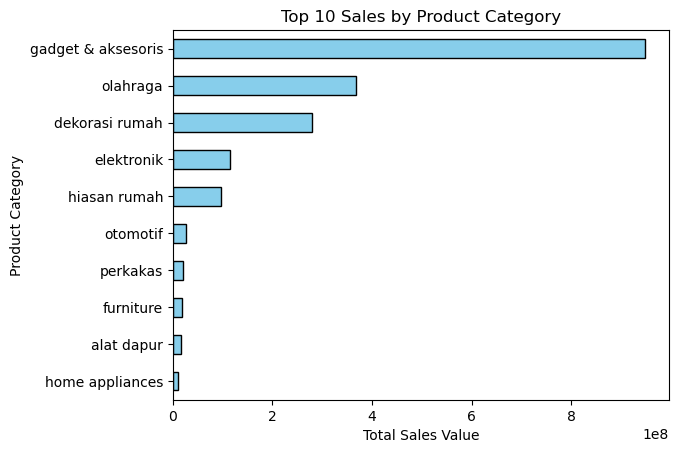

In [26]:
top_10_categories.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Top 10 Sales by Product Category')
plt.xlabel('Total Sales Value')
plt.ylabel('Product Category')
plt.show()

#### Gadget & Aksesosirs is the number 1 product category that generated the most total sales value for around 950 million, followed by Olahraga and Dekorasi Rumah. While the bottom three categories are Bahan Makanan, Kesehatan, and Aksesoris Rumah.

In [27]:
# Daily Sales
daily_sales = df.resample('D', on='timestamp purchase')['total harga'].sum()
daily_sales

timestamp purchase
2023-01-01       80000
2023-01-02    20000000
2023-01-03    17030000
2023-01-04      209000
2023-01-05           0
                ...   
2023-05-26      690000
2023-05-27     1001000
2023-05-28           0
2023-05-29     4264000
2023-05-30     8040000
Freq: D, Name: total harga, Length: 150, dtype: int64

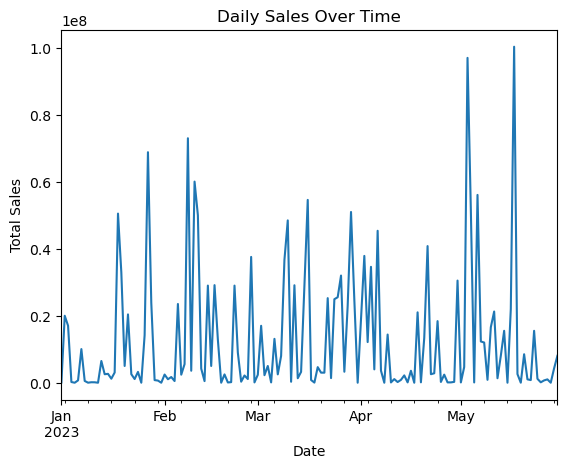

In [28]:
#daily_sales plot
daily_sales.plot()
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

In [29]:
# Weekly Sales
weekly_sales = df.resample('W-Mon', on='timestamp purchase')['total harga'].sum()
weekly_sales

timestamp purchase
2023-01-02     20080000
2023-01-09     28527000
2023-01-16     13147000
2023-01-23    115551000
2023-01-30    111542000
2023-02-06     31590000
2023-02-13    196880000
2023-02-20     78578000
2023-02-27     79304000
2023-03-06     39901000
2023-03-13    126387000
2023-03-20     95450000
2023-03-27    115388000
2023-04-03    167700000
2023-04-10    102039000
2023-04-17      7989000
2023-04-24     99082000
2023-05-01     33685000
2023-05-08    233601000
2023-05-15     63598000
2023-05-22    135234000
2023-05-29     22760000
2023-06-05      8040000
Freq: W-MON, Name: total harga, dtype: int64

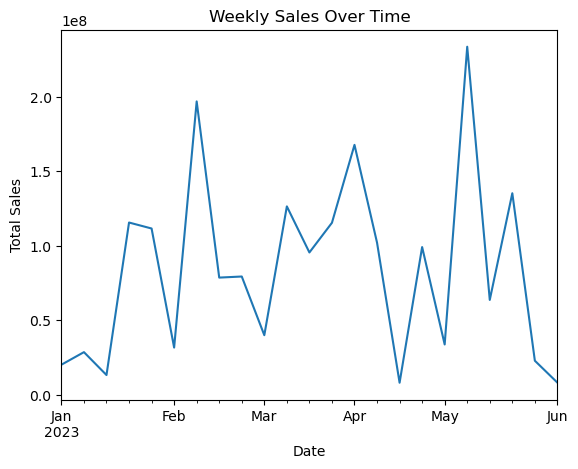

In [30]:
#weekly_sales plot
weekly_sales.plot()
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

In [31]:
# Monthly Sales
monthly_sales = df.resample('M', on='timestamp purchase')['total harga'].sum()
monthly_sales

timestamp purchase
2023-01-31    288847000
2023-02-28    386442000
2023-03-31    475763000
2023-04-30    311679000
2023-05-31    463322000
Freq: M, Name: total harga, dtype: int64

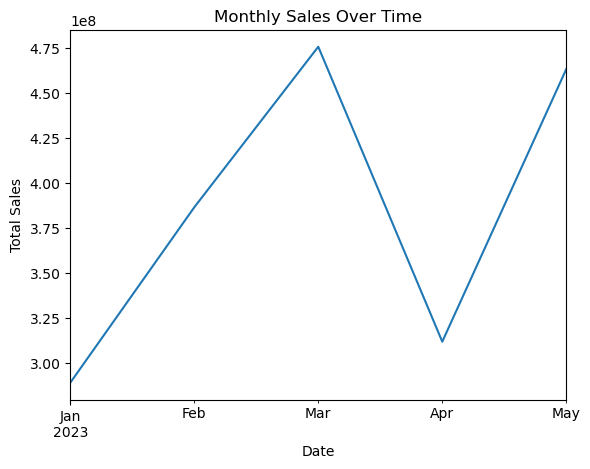

In [32]:
#monthly_sales plot
monthly_sales.plot()
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

#### From the monthly sales over time plot, we gain insights that March and May generated the biggest total sales among the other months. This is maybe due to the some several events during the year.